# Tutorial 8 - Unsupervised Learning
## K-Means, Gaussian Mixture Model, Principal Component Analysis (PCA)

In this tutorial, we will explore three powerful unsupervised learning techniques: K-Means, Gaussian Mixture Model (GMM), and Principal Component Analysis (PCA). Each of these methods has its unique strengths and applications, making them valuable tools for different data exploration and clustering tasks.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## K-Means Clustering Based on Population and Employment
You are encouraged to read this documentation content (https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html) before moving on.

Consider again the Bay Area, we now have the population and employment data for the potential catchment area for each subway station of BART (Bay Area Rapid Transit). The figure shown below is the BART catchment are layout, the color deepness represent the amount of population. The Picture is based on Google Map. On the right hand side, the BART map is shown (adopted from https://www.bart.gov/news/articles/2019/news20190712-1). Please ignore the Caltrain and Amtrack lines.

|||
|--|--|
|<img src="./img/BART_Catchment.png" width="400"> | <img src="./img/BART_Map.png" width="400">|

In [2]:
# take the first 48 stations becasue the 
# last 2 stations were not yet opened
# by the time this data was collected
data_BART_sld = pd.read_csv('data_X.csv').iloc[:48, :]
X = data_BART_sld[['TotPop', 'TotEmp']].to_numpy()

Text(0, 0.5, 'Employment')

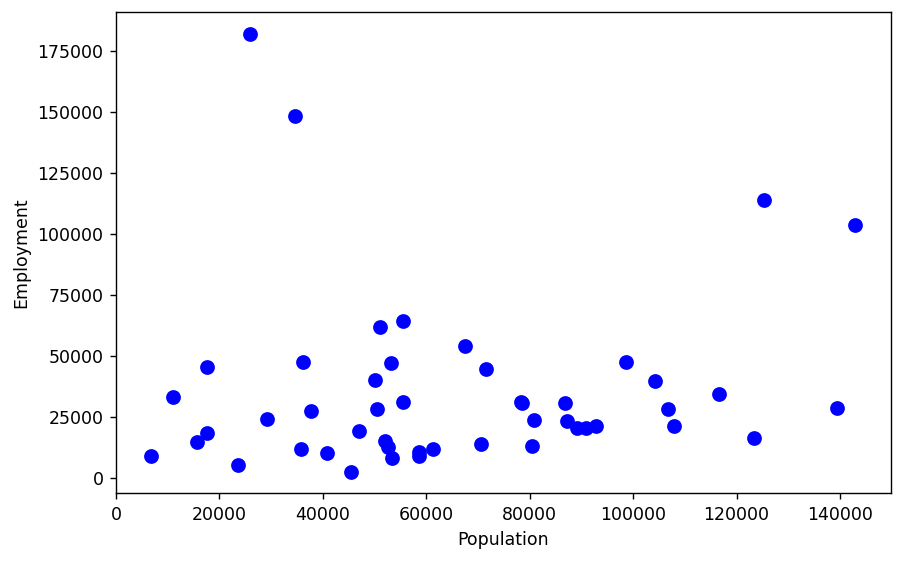

In [3]:
# visualization
plt.figure(figsize=[8, 5], dpi=125)
plt.plot(X[:, 0], X[:, 1], 'b.', markersize=15)
plt.xlabel('Population')
plt.ylabel('Employment')

In [4]:
from sklearn.cluster import KMeans

In [5]:
c = 4  # number of clusters
kmeans = KMeans(n_clusters=c, random_state=42)
kmeans = kmeans.fit(X)

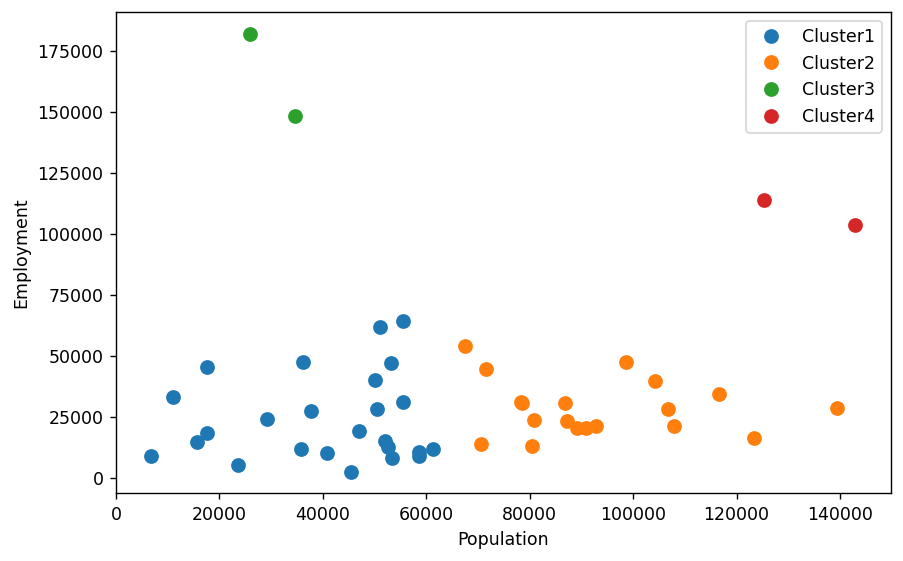

In [6]:
# visualization
plt.figure(figsize=[8, 5], dpi=125)
for i in range(c):
    plt.plot(X[:, 0][kmeans.labels_==i], X[:, 1][kmeans.labels_==i], '.', markersize=15, label='Cluster{:}'.format(i+1))
plt.xlabel('Population')
plt.ylabel('Employment')
plt.legend()

## Principal Component Analysis Based on Population and Employment
You are encouraged to read this documentation content (https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) before moving on. 

We now consider the total population and number of households that own 0 automobiles. 

In [7]:
from sklearn.decomposition import PCA

In [8]:
# data
X = data_BART_sld[['TotPop', 'AutoOwn0']].to_numpy()

Text(0, 0.5, 'AutoOwn0')

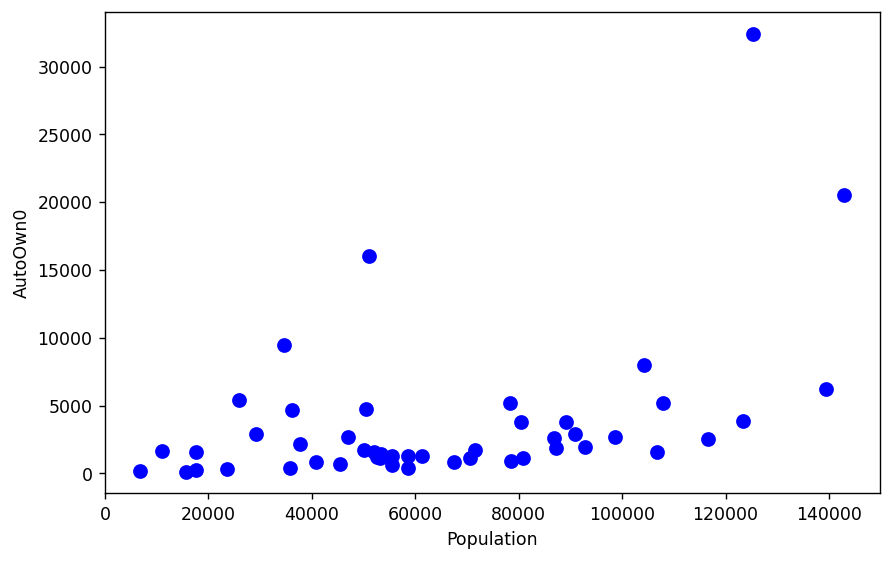

In [9]:
# visualization
plt.figure(figsize=[8, 5], dpi=125)
plt.plot(X[:, 0], X[:, 1], 'b.', markersize=15)
plt.xlabel('Population')
plt.ylabel('AutoOwn0')

In [11]:
pca = PCA(n_components=2)
pca.fit(X)

PCA(n_components=2)

In [12]:
print('The first principal conponent can represent {:.4}% information'.format(pca.explained_variance_ratio_[0]*100))
print('The second principal conponent can represent {:.4}% information'.format(pca.explained_variance_ratio_[1]*100))


The first principal conponent can represent 97.85% information
The second principal conponent can represent 2.149% information


## Gaussian Mixture Model Based on Traffic Flow data
You are encouraged to read these two documentation contents (https://scikit-learn.org/stable/modules/mixture.html and https://scikit-learn.org/stable/modules/generated/sklearn.mixture.GaussianMixture.html#sklearn.mixture.GaussianMixture) before moving on. 

Consider the traffic flow data from Highways England Webtrics (https://webtris.highwaysengland.co.uk/), we are trying to fit a Gaussian Mixture Model for the traffic flow data for one single detector. This detector is located on the M4 highway near Heathrow Airport as shown in figure below (ID: M4/2240B). The date ranges from September 1st of 2019 to September 30th of 2019. We are providing the flow data as "csv" file. The time granularity is 15 minutes. 

<img src='img/Loc_Detector.png' width=700>

### Data

In [13]:
data = pd.read_csv('Traffic_Flow_Data.csv', index_col=0)
flow = data.to_numpy()[:, :-1].flatten()  # we drop the last one because it is the total flow
time = np.array(data.columns)[:-1]

Text(0, 0.5, 'Frequency')

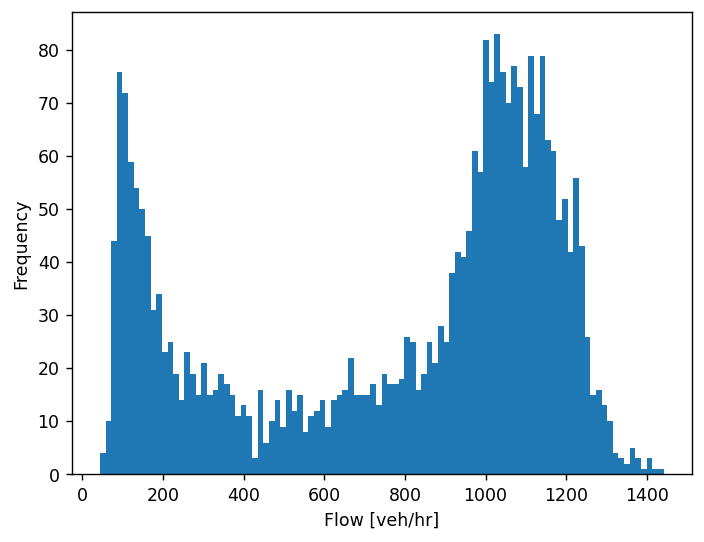

In [14]:
# visualization
plt.figure(dpi=125)
plt.hist(flow, bins=100)
plt.xlabel('Flow [veh/hr]')
plt.ylabel('Frequency')

In [15]:
from sklearn.mixture import GaussianMixture

In [16]:
gm = GaussianMixture(n_components=3, random_state=42, max_iter=1000)
gm = gm.fit(flow.reshape(-1, 1))


In [17]:
print('The mean values are\n', gm.means_)
print('The variances are\n', gm.covariances_)

The mean values are
 [[ 588.75576061]
 [1077.2930983 ]
 [ 143.55719691]]
The variances are
 [[[56640.62889123]]

 [[13470.0968887 ]]

 [[ 2883.14307605]]]


In [18]:
def plot_gaussian(mean, variance, weight):
    std = np.sqrt(variance)
    
    x = np.linspace(0, 1500, 250)
    y = 1 / (std*np.sqrt(2*(np.pi))) * np.exp(-0.5*((x - mean)/std)**2)
    
    plt.plot(x, y*weight, '--')
    return y*weight

Text(0, 0.5, 'Probability density')

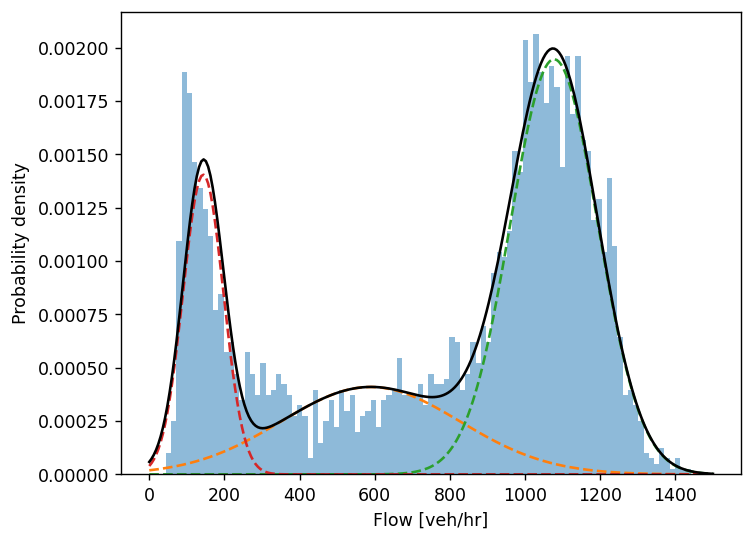

In [19]:
# visualization
fig = plt.figure(dpi=125)

plt.hist(flow, bins=100, density=True, alpha=0.5)

x = np.linspace(0, 1500, 250)
y = np.zeros(250)
for i in range(gm.means_.shape[0]):
    y += plot_gaussian(gm.means_[i, 0], gm.covariances_[i, 0, 0], gm.weights_[i])

plt.plot(x, y, 'black')

plt.xlabel('Flow [veh/hr]')
plt.ylabel('Probability density')